FastAI APIs

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.1MB/s 
     |████████████████████████████████| 1.2MB 39.2MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 194kB 49.9MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *

# CNN Learner for Image Classification

epoch,train_loss,valid_loss,error_rate,time
0,0.147552,0.023821,0.008119,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.064029,0.017376,0.007442,00:56


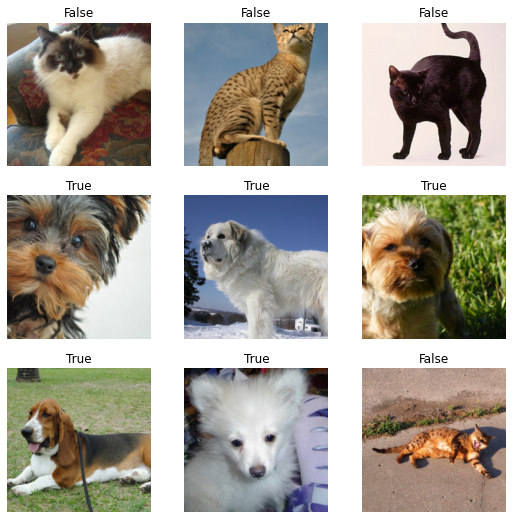

In [15]:

path = untar_data(URLs.PETS)/'images'
img_files = get_image_files(path)

def is_dog(pet_name): return pet_name[0].islower()
dls_1 = ImageDataLoaders.from_name_func(path, img_files, valid_pct=0.2, seed=50, label_func=is_dog, item_tfms=Resize(224))

dls_1.show_batch()

learn = cnn_learner(dls_1, resnet34, metrics=error_rate)
# learn.lr_find()
# # fine_tune - Because we are using a pretrained model. There is already a method fit which is used in creating new models.
learn.fine_tune(1)

## CNN Image CLassification for identifying breed form the name of the image.


SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.00363078061491251)

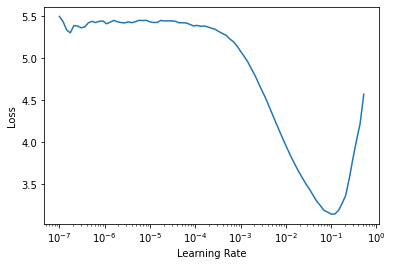

In [4]:
name = r'^(.*)_\d+.jpg'
dls_2 = ImageDataLoaders.from_name_re(path, img_files, name, item_tfms=Resize(224))
learn_breed = cnn_learner(dls_2, resnet34, metrics=error_rate)
learn_breed.lr_find()

In [ ]:
# fine_tune - Because we are using a pretrained model. There is already a method fit which is used in creating new models.
learn_breed.fine_tune(8 ,1e-2)

Is this a dog?: True.
Probability it's a dog: 0.999969


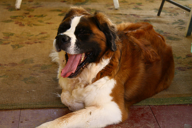

In [16]:
#Positive case
img_file = img_files[2]
is_dog,_,probs = learn.predict(img_file)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")
img = PILImage.create(img_file)
img.to_thumb(192)


Is this a dog?: False.
Probability it's a dog: 0.000247


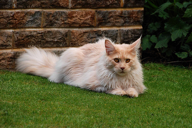

In [17]:
#Negative case
img_file = img_files[0]
is_dog,_,probs = learn.predict(img_file)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")
img = PILImage.create(img_file)
img.to_thumb(192)

# UNET Learner for Segmentation

In [18]:
#Load Data from CAMVID Library
path = untar_data(URLs.CAMVID_TINY)
#Reading files from image folder
files = get_image_files(path/"images")
#getting labels form the labels folder
label = lambda value: path/'labels'/f'{value.stem}_P{value.suffix}'
#using codes file to load text data
codes = np.loadtxt(path/'codes.txt', dtype=str)
dls_seg = SegmentationDataLoaders.from_label_func( path, bs=8, fnames=files , label_func=label, codes=codes)
learn_seg = unet_learner(dls_seg, resnet34)

SuggestedLRs(lr_min=0.0007585775572806596, lr_steep=0.0004786300996784121)

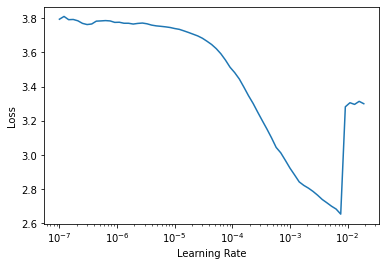

In [9]:
learn_seg.lr_find()

In [10]:
learn_seg.fine_tune(6, 1e-3)

epoch,train_loss,valid_loss,time
0,3.227298,2.660406,00:01


epoch,train_loss,valid_loss,time
0,1.846637,1.508544,00:01
1,1.554986,1.139262,00:01
2,1.339152,1.071072,00:01
3,1.179726,0.964790,00:01
4,1.056765,0.866212,00:01
5,0.965842,0.875780,00:01


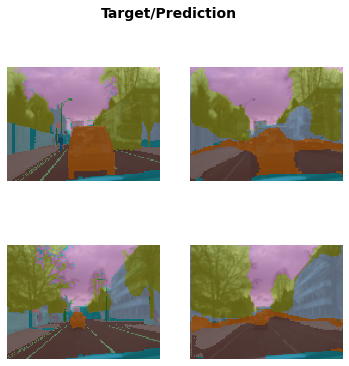

In [ ]:
learn_seg.show_results()

# Text Data Loaders

In [ ]:
from fastai.text.all import *
#Loads data from IMDB url
dls_text = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
#train model using AWD_LSTM
learn_text = text_classifier_learner(dls_text, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn_text.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.473829,0.400491,0.818120,03:37


epoch,train_loss,valid_loss,accuracy,time
0,0.303308,0.239743,0.904160,07:03
1,0.224567,0.217876,0.917200,07:03
2,0.188470,0.186742,0.926640,07:03
3,0.152877,0.192688,0.929200,07:03


In [ ]:
#Testing the data
learn_text.predict("I really liked that movie!")

('pos', tensor(1), tensor([3.4155e-04, 9.9966e-01]))

# Tabular Learner

In [19]:
#Tabular data classification  
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)
category_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
dls_tab = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary", cat_names = category_names , cont_names = ['age', 'fnlwgt', 'education-num'], procs = [Categorify, FillMissing, Normalize])
learn_tab = tabular_learner(dls_tab, metrics=accuracy)

SuggestedLRs(lr_min=0.03019951581954956, lr_steep=0.0030199517495930195)

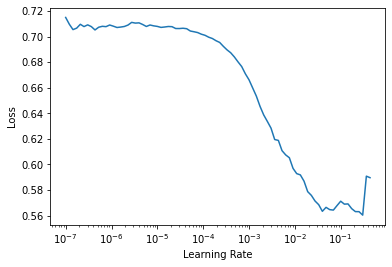

In [20]:
learn_tab.lr_find()

In [21]:
learn_tab.fine_tune(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.392946,0.382252,0.835995,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.368438,0.353020,0.840602,00:05
1,0.347631,0.346122,0.841370,00:05
2,0.337130,0.337703,0.849048,00:05


# Ranking Learner

In [34]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls_rank = CollabDataLoaders.from_csv(path/'ratings.csv')
learn_rank = collab_learner(dls_rank, y_range=(0.5,5.5))


In [33]:
learn_rank.fine_tune(10)

epoch,train_loss,valid_loss,time
0,0.041388,1.381793,00:00


epoch,train_loss,valid_loss,time
0,0.041166,1.381290,00:00
1,0.037625,1.380202,00:00
2,0.038950,1.380120,00:00
3,0.037222,1.379653,00:00
4,0.034138,1.377152,00:00
5,0.034843,1.376762,00:00
6,0.031398,1.375946,00:00
7,0.029566,1.375336,00:00
8,0.030716,1.375210,00:00
9,0.029825,1.375209,00:00
